
Linear regression for reference
 Score on the train set: 0.54
 Score on the test set: 0.41
 lr.coef_: [ -43.80622171 -265.4353668   400.48498367  364.09281508 -918.66670754
  605.71411163  192.05758742  321.0454638   868.16663632   88.02155757]
 lr.intercept_: 152.36792916625515

Lasso
 Score in train set: 0.38
 Score in test set: 0.35
 lasso.coef_: [  0.           0.         274.32681397  48.58596734   0.
   0.          -0.           0.         424.11801795   0.        ]
 lasso.intercept_: 152.0546824609995

Ridge
 Score in train set: 0.45
 Score in test set: 0.36
 ridge.coef_: [  20.86524598  -58.00074047  231.26919104  186.6748608    33.3106947
   -2.16998131 -150.95053633  141.35047981  250.75403183  123.1796716 ]
 ridge.intercept_: 152.1575365960103



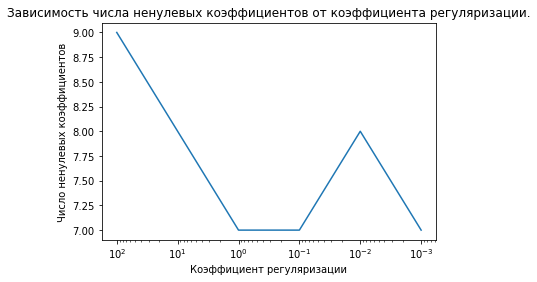

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, KFold 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn import linear_model 
from sklearn.preprocessing import scale
from sklearn.svm import SVR

data = load_diabetes()# 1. Загрузка стандартной выборки sklearn diabetes().

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)# Разделение на обучающую и тестовую выборки в соотношении 7/3
lr = LinearRegression().fit(X_train, y_train)
print()
print("Linear regression for reference")
print(" Score on the train set: {:.2f}".format(lr.score(X_train, y_train))) 
print(" Score on the test set: {:.2f}".format(lr.score(X_test, y_test)))
print(" lr.coef_: {}".format(lr.coef_))
print(" lr.intercept_: {}".format(lr.intercept_))
print()

lasso = Lasso(random_state=241).fit(X_train, y_train)# 2.Обучение линейной регрессии с регуляризаторами Lasso и Ridge
print("Lasso")
print(" Score in train set: {:.2f}".format(lasso.score(X_train, y_train)))
print(" Score in test set: {:.2f}".format(lasso.score(X_test, y_test)))
print(" lasso.coef_: {}".format(lasso.coef_))
print(" lasso.intercept_: {}".format(lasso.intercept_))
print()

ridge = Ridge(random_state=241).fit(X_train, y_train)
print("Ridge")
print(" Score in train set: {:.2f}".format(ridge.score(X_train, y_train)))
print(" Score in test set: {:.2f}".format(ridge.score(X_test, y_test)))
print(" ridge.coef_: {}".format(ridge.coef_))
print(" ridge.intercept_: {}".format(ridge.intercept_))
print()

alphas = [0.001, 0.01, 0.1, 1, 10, 100] # Построение графика зависимости числа ненулевых коэффициентов от коэффициента регуляризации.
#alphas = np.arange(-10, 10, 0.1) # (from, to, step)

coefs = [] 
e = 0.01 
for a in alphas: 
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False) 
    ridge.fit(X_train, y_train) 
    k = 0 
    for i in range(len(ridge.coef_)): 
       if ridge.coef_[i] > e: 
          k = k + 1 
    coefs.append(k) 
ax = plt.gca() 
ax.plot(alphas, coefs) 
ax.set_xscale('log') 
ax.set_xlim(ax.get_xlim()[::-1])   
plt.xlabel('Коэффициент регуляризации') 
plt.ylabel('Число ненулевых коэффициентов') 
plt.title('Зависимость числа ненулевых коэффициентов от коэффициента регуляризации.') 
plt.show()

In [ ]:
preds = ridge.predict(X_test)# 3. Подсчёт метрик для Ridge
mae = mean_squared_error(y_test, preds)
rmse = np.sqrt(mae)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("Metrics for Ridge")
print(" RMSE: ", rmse)
print(" MAE: ", mae)
print(" R2: ", r2)
print()

Metrics for Ridge
 RMSE:  168.59763871094276
 MAE:  152.3641161794048
 R2:  -4.352397172279842



0.04040404040404041
RMSE:  55.6760533319048
MAE:  47.081209881695074
R2:  0.4163100155969037


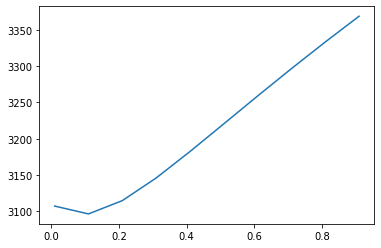

In [ ]:
Estimator = Ridge() # 4. Построение графиков зависимости функции от потерь коэффициента регуляризации
Param_Grid = { "alpha" : np.linspace(0, 1, 100)}  
cv = KFold(5) 
Grid = GridSearchCV(Estimator, param_grid = Param_Grid, cv = cv, error_score = mae) 
Gridfit = Grid.fit(X_train, y_train) 
loss = [] 
alphaloss = [] 
alpha = 0.01 
while alpha <= 1: 
    ridge = Ridge(alpha).fit(X_train, y_train)  
    preds = ridge.predict(X_test) 
    loss.append(mean_squared_error(y_test, preds)) 
    alphaloss.append(alpha) 
    alpha += 0.1 
plt.plot(alphaloss, loss) 
print(Grid.best_params_['alpha']) 
rg = Ridge(Grid.best_params_['alpha']).fit(X_train, y_train)  
preds = rg.predict(X_test)  
mse = mean_squared_error(y_test, preds)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test, preds)  
r2 = r2_score(y_test, preds)  
print("RMSE: ", rmse)  
print("MAE: ", mae)  
print("R2: ", r2) 


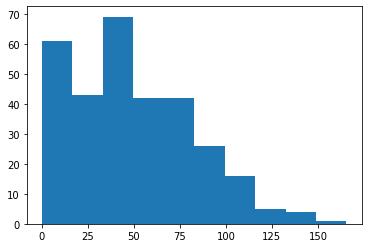

In [ ]:
ridge_pred = cross_val_predict(ridge, X_train, y_train, cv = 5) # 5. Смотрим гистограмму ошибок
main_value = y_train 
counter_errors = abs(ridge_pred - main_value) 
plt.hist(counter_errors) 
plt.show() 


In [ ]:
ErrorArr = np.where(counter_errors < 45) # 6. Убрать выбросы (Всё, что меньше 45)
print(ErrorArr)
X_train = pd.DataFrame(X_train).iloc[ErrorArr] 
y_train = pd.DataFrame(y_train).iloc[ErrorArr] 
#ridge = Ridge(random_state=241) 
best_pred = cross_val_predict(ridge, X_train, y_train, cv=5) 
best_ridge = Ridge(Grid.best_params_['alpha']).fit(X_train, y_train) 
best_pred = best_ridge.predict(X_test)
mse2 = mean_squared_error(y_test, best_pred) # Подсчёт метрик
rmse2 = np.sqrt(mse2) 
mae2 = mean_absolute_error(y_test, best_pred) 
r22 = r2_score(y_test, best_pred) 
print("RMSE: ", rmse2) 
print("MAE: ", mae2) 
print("R2: ", r22)

(array([  0,   2,   4,   7,   8,  12,  17,  19,  20,  23,  24,  25,  26,
        27,  29,  30,  31,  32,  34,  36,  38,  39,  40,  41,  42,  46,
        48,  49,  50,  51,  53,  55,  60,  62,  65,  67,  69,  71,  73,
        74,  76,  79,  80,  81,  85,  86,  87,  89,  91,  99, 102, 103,
       104, 105, 107, 114, 115, 117, 118, 119, 121, 123, 125, 126, 127,
       129, 130, 136, 137, 139, 140, 142, 145, 146, 153, 156, 157, 158,
       160, 161, 164, 165, 168, 169, 171, 172, 173, 174, 175, 176, 178,
       179, 181, 186, 188, 190, 191, 193, 197, 198, 205, 206, 208, 210,
       211, 214, 215, 217, 218, 219, 223, 224, 227, 228, 229, 230, 232,
       233, 234, 235, 236, 237, 240, 242, 243, 244, 245, 246, 249, 250,
       251, 253, 255, 259, 260, 263, 264, 265, 267, 270, 273, 275, 276,
       280, 281, 284, 288, 291, 293, 295, 296, 297, 299, 302, 303, 306,
       307]),)
RMSE:  57.70717122795233
MAE:  48.67907429801862
R2:  0.3729460198076089
